Blog: https://medium.com/@ukpowehonome/house-rent-prediction-with-machine-learning-2960d753e3ca

Github : https://github.com/Ukpoweh/house-rent-prediction/blob/main/House_rent_prediction.ipynb


In [71]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns # for easy to use plot the data

In [72]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [73]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [74]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [75]:
df.shape

(4746, 12)

In [76]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [78]:
df.duplicated().sum()

0

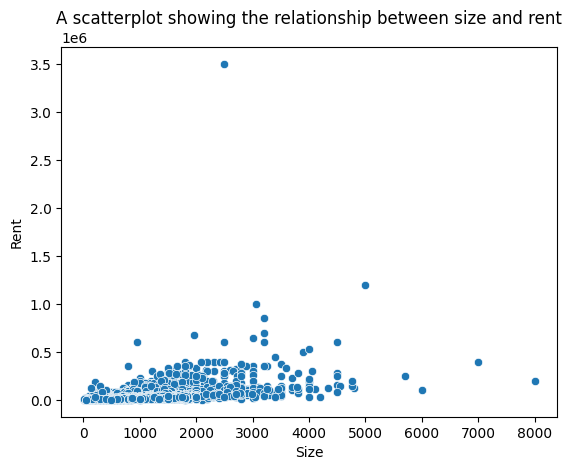

In [79]:
sns.scatterplot(x='Size', y='Rent', data=df)
plt.title("A scatterplot showing the relationship between size and rent")
plt.show()

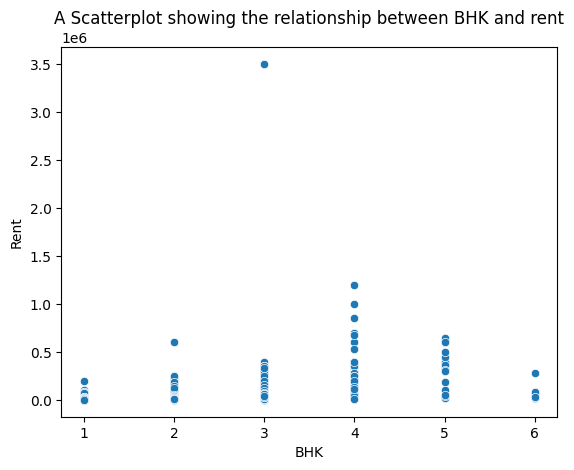

In [80]:
sns.scatterplot(x='BHK', y='Rent', data=df)
plt.title("A Scatterplot showing the relationship between BHK and rent")
plt.show()

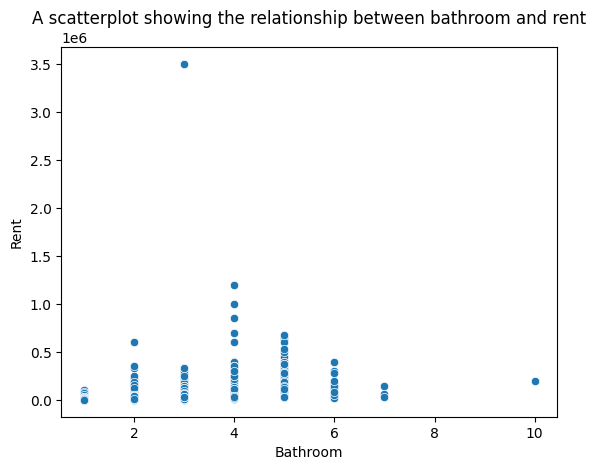

In [81]:
sns.scatterplot(x='Bathroom',y='Rent',data=df)
plt.title('A scatterplot showing the relationship between bathroom and rent')
plt.show()

In [82]:
rent_high = df.query('Rent == 3.5e+06')
rent_high

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent


In [83]:
cat_cols = ['Floor', 'Area Type', 'Area Locality', 'City', 
            'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
     

In [84]:
for col in cat_cols:
    print(df[col].value_counts())

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64
Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64
Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: count, Length: 2235, dtype: int64
City
Mumbai       972
Chennai      891
Bangalo

In [85]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
for cat_col in cat_cols:
    df[cat_col] = le.fit_transform(df[cat_col])

In [86]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,455,2,221,4,2,1,2,2
1,2022-05-13,2,20000,800,14,2,1527,4,1,1,1,2
2,2022-05-16,2,17000,1000,14,2,1760,4,1,1,1,2
3,2022-07-04,2,10000,800,10,2,526,4,2,1,1,2
4,2022-05-09,2,7500,850,10,1,1890,4,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,271,1,219,3,1,1,2,2
4742,2022-05-15,3,29000,2000,16,2,1214,3,1,1,3,2
4743,2022-07-10,3,35000,1750,271,1,724,3,1,1,3,0
4744,2022-07-06,3,45000,1500,226,1,590,3,1,2,2,0


In [87]:
for i in cat_cols:
  print(df[i].value_counts())
     

Floor
10     379
455    350
196    312
198    308
14     293
      ... 
58       1
352      1
162      1
73       1
226      1
Name: count, Length: 480, dtype: int64
Area Type
2    2446
1    2298
0       2
Name: count, dtype: int64
Area Locality
225     37
590     29
559     24
2071    22
1270    22
        ..
985      1
807      1
1681     1
2222     1
1214     1
Name: count, Length: 2235, dtype: int64
City
5    972
1    891
0    886
3    868
2    605
4    524
Name: count, dtype: int64
Furnishing Status
1    2251
2    1815
0     680
Name: count, dtype: int64
Tenant Preferred
1    3444
0     830
2     472
Name: count, dtype: int64
Point of Contact
2    3216
0    1529
1       1
Name: count, dtype: int64


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   int32 
 5   Area Type          4746 non-null   int32 
 6   Area Locality      4746 non-null   int32 
 7   City               4746 non-null   int32 
 8   Furnishing Status  4746 non-null   int32 
 9   Tenant Preferred   4746 non-null   int32 
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   int32 
dtypes: int32(7), int64(4), object(1)
memory usage: 315.3+ KB


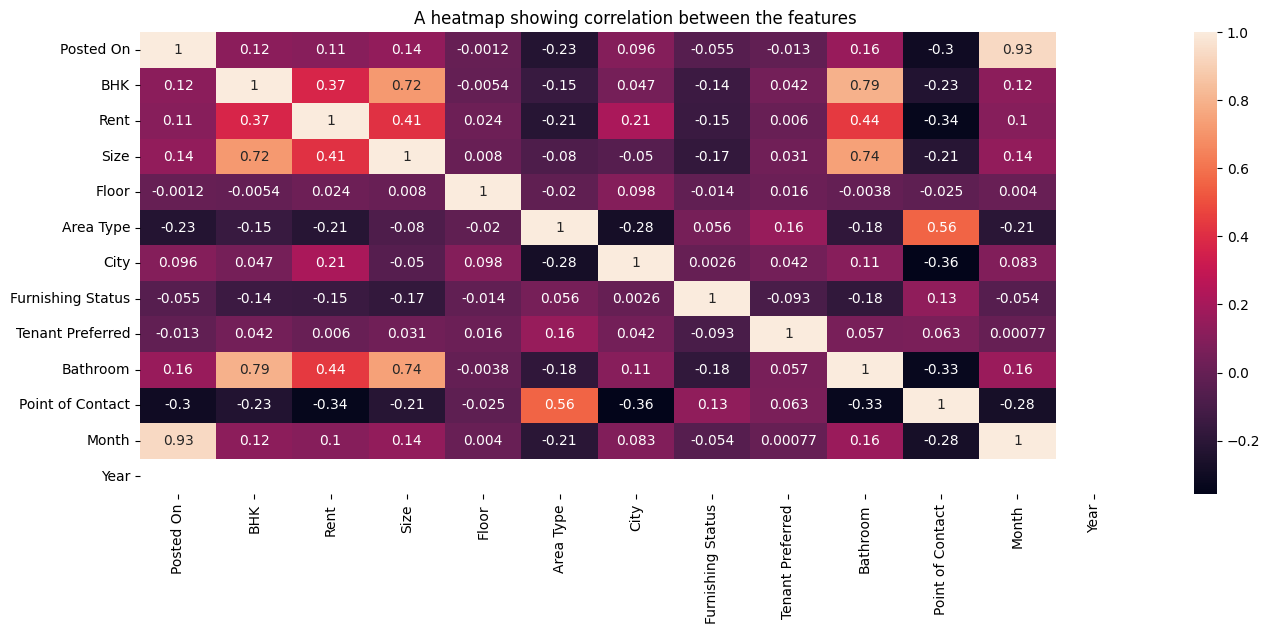

In [89]:
df_filtered = df.drop('Area Locality', axis=1)  # Exclude the column

# Convert 'Posted On' column to datetime (if applicable)
df_filtered['Posted On'] = pd.to_datetime(df_filtered['Posted On'])

# Create new features from date (optional)
df_filtered['Month'] = df_filtered['Posted On'].dt.month
df_filtered['Year'] = df_filtered['Posted On'].dt.year

plt.figure(figsize=(16, 6))
sns.heatmap(df_filtered.corr(), annot=True)
plt.title("A heatmap showing correlation between the features")
plt.show()

In [90]:
x = df.drop(['Posted On','Rent'],axis=1).values

In [91]:
y = df['Rent'].values

In [92]:
x.shape

(4746, 10)

In [93]:
y.shape

(4746,)

In [94]:
from sklearn.metrics import mean_squared_error
def rmse(ytest,ypred):
    result = np.sqrt(mean_squared_error(ytest,ypred))
    return result

In [95]:
def r2score(model):
    score = model.score(rescaledX_test,y_test)
    return score

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(x_train)
rescaledX_test = scaler.transform(x_test)

Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(rescaledX_train, y_train)

LinearRegression()

In [99]:
y_pred_lr = lr.predict(rescaledX_test)

In [100]:
r2score(lr)

0.4769277942651481

In [101]:
rmse(y_test, y_pred_lr)

42905.400830172315